In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import statsmodels.api as sm
import scipy.stats as st
from scipy.stats import chi2_contingency 

plt.style.use('fivethirtyeight')

In [2]:
churn=pd.read_csv("CustomerChurn.csv")
churn.shape

(7043, 21)

In [3]:
churn.sample(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
58,3957-SQXML,Female,0,Yes,Yes,34,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.95,894.3,No
3782,8800-JOOCF,Female,0,No,Yes,12,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.05,966.55,No
510,4332-MUOEZ,Male,1,Yes,Yes,20,Yes,No,Fiber optic,Yes,...,Yes,Yes,No,Yes,One year,No,Credit card (automatic),94.30,1818.3,No
616,6464-KEXXH,Male,0,No,No,8,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),25.25,186.3,No


# Two sample t test:

**Null Hypothesis:** Mean monthly charges are the same for churn and non-churn customers

**Alternate Hypothesis:** Mean monthly charges are not same for churn and non-churn customers

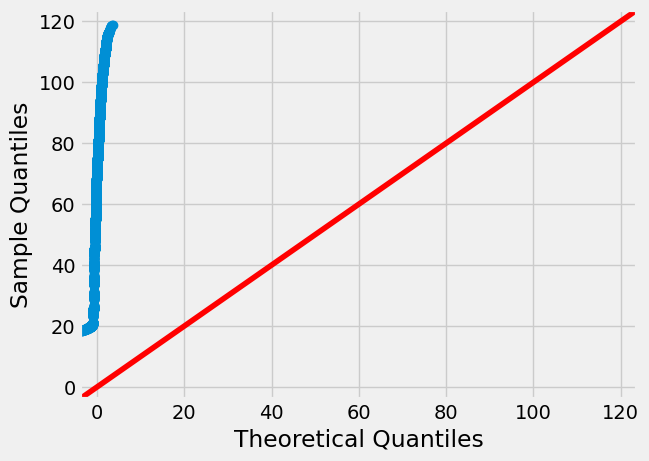

In [4]:
sm.qqplot(churn['MonthlyCharges'],line='45')
plt.show()

In [5]:
churn_customers=churn[churn['Churn']=='Yes']['MonthlyCharges']
loyal_customers=churn[churn['Churn']=='No']['MonthlyCharges']

In [6]:
t_stats,p_value=st.ttest_ind(a=churn_customers,b=loyal_customers,equal_var=False)

In [7]:
print(f"The test statistics is {round(t_stats,2)}, and the p_value is {round(p_value,4)}")

The test statistics is 18.41, and the p_value is 0.0


With a t statistics of 18.41 and p_value less than 0.05, we reject the null hypothesis, suggesting that there is a significant difference between average monthly charges between the two types of customers.

# Chi Square test for Independence:

**Null Hypothesis:** Churn is independent of payment method (i.e., paying via Electronic Check or not doesn't affect churn rate).

**Alternate Hypothesis:** Churn rates is different between Electronic Check payers and those using other payment methods

In [8]:
churn['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [9]:
churn['Payment']=churn['PaymentMethod'].apply(lambda x: 'Electronic Method' if x=='Electronic check' else 'Other')

In [10]:
observed=pd.crosstab(churn['Payment'],churn['Churn'])
observed

Churn,No,Yes
Payment,,
Electronic Method,1294,1071
Other,3880,798


In [11]:
res=chi2_contingency(observed)

In [12]:
print(f"The test statistics is {round(res.statistic,2)}, and the p_value is {round(res.pvalue,4)}")

The test statistics is 640.56, and the p_value is 0.0


In [13]:
res.expected_freq

array([[1737.40025557,  627.59974443],
       [3436.59974443, 1241.40025557]])

With a test statistics of 640.56 and p_value less than 0.05, we reject the null hypothesis, suggesting evidence that churn is related to payment method — particularly, customers who pay via Electronic Check are much more likely to churn than others.

# Two sample t test:

**Null Hypothesis:** The mean tenure is equal for both churners and non-churners

**Alternate Hypotheis:** The mean tenure is different between the two groups.

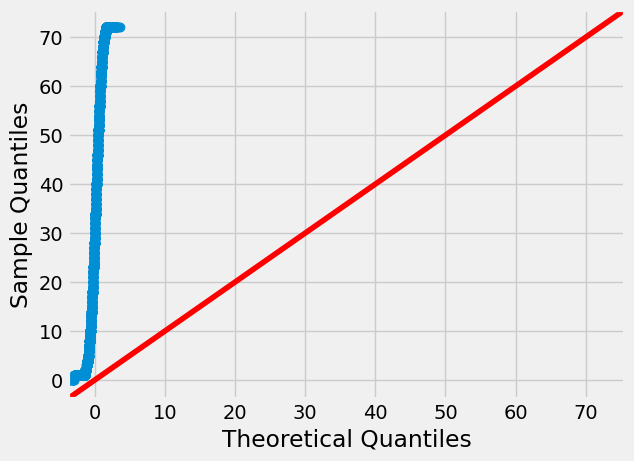

In [14]:
sm.qqplot(churn['tenure'],line='45')

plt.show()

In [15]:
loyal_customers=churn[churn['Churn']=="No"]["tenure"]
churn_customers=churn[churn['Churn']=="Yes"]["tenure"]

In [16]:
t_stat, p_value_equal_var = st.ttest_ind(a=loyal_customers, b=churn_customers, equal_var=True)

print("Student's T-Test assuming equal variances:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value_equal_var}")

Student's T-Test assuming equal variances:
T-statistic: 31.57955051135377
P-value: 7.99905796059022e-205


With a t statistics of 31.6 and p-value less than 0.05, we reject the null hypothesis and conclude that the tenure for both the types of customers are different.

# Chi Square test for Independence:

In [17]:
churn['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [18]:
bins = [0, 12, 36, 60, 72]
labels = ['New', 'Intermediate', 'Experienced', 'Veteran']
churn['tenure_category'] = pd.cut(churn['tenure'], bins=bins, labels=labels, right=True, include_lowest=True)
churn['tenure_category']

0                New
1       Intermediate
2                New
3        Experienced
4                New
            ...     
7038    Intermediate
7039         Veteran
7040             New
7041             New
7042         Veteran
Name: tenure_category, Length: 7043, dtype: category
Categories (4, object): ['New' < 'Intermediate' < 'Experienced' < 'Veteran']

**Null Hypothesis:** Churn is independent of tenure category

**Alternate Hypothesis:** Churn depends on tenure category

In [19]:
observed=pd.crosstab(churn['tenure_category'],churn['Churn'])
observed

Churn,No,Yes
tenure_category,,
New,1149,1037
Intermediate,1382,474
Experienced,1329,265
Veteran,1314,93


In [20]:
res = chi2_contingency(observed, correction=False)

In [21]:
print(f"The test statistics is {round(res.statistic,2)}, and the p_value is {round(res.pvalue,4)}")

The test statistics is 857.74, and the p_value is 0.0


With a test statist of 857.74 and p value less that 0.05, we reject the null hypothesis and conclude that the tenure of churners and non-churners are different

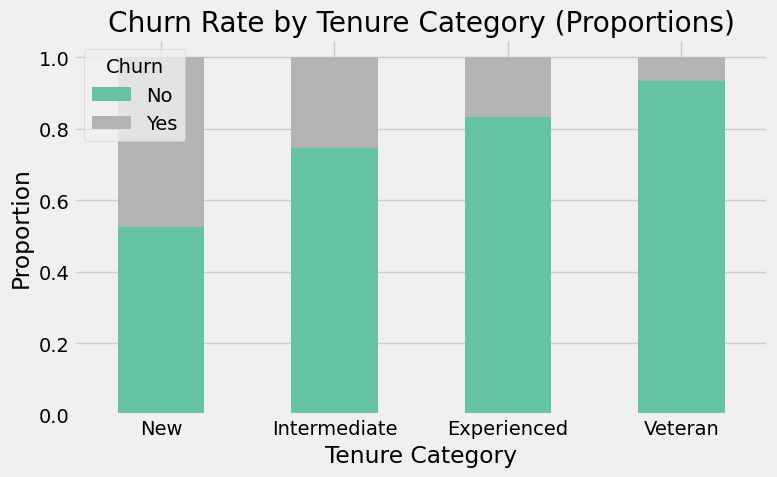

In [22]:
observed_percent = pd.crosstab(churn['tenure_category'], churn['Churn'], normalize='index')

# Plot
observed_percent.plot(kind='bar', stacked=True, colormap='Set2', figsize=(8,5))
plt.title('Churn Rate by Tenure Category (Proportions)')
plt.ylabel('Proportion')
plt.xlabel('Tenure Category')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

We can also confirm from the plot that churning depends on tenure.